In [5]:
import numpy as np
import scipy

def import_and_split(filename, M=64, fs=22050, crop=True,normalize=True):
    raw = np.fromfile(filename, 'int32')
    raw = raw.astype(np.float32)
    #print("Raw import shape is " + str(raw.shape))
    # remove first second of data
    if crop:
      raw = raw[M*fs:]
    K = int(len(raw) / M)
    x__ = np.empty([M, K],np.float32)
    for i in range(8):
      for j in range(8):
        n = 8*i + j
        try:
          x__[n,:] = raw[n:len(raw):M]
          
          ### in case we accidentally flipped the ribbon cables on the NIST MK3
          ### use this line to flip the data back
          #x__[n,:] = raw[8*(i+1)-(j+1):len(raw):M]
        except:
          #TODO: Hack? Fixes the 1-sample issue mentioned in mk3cap?
          print("Exception thrown in import_and_split")
          x__[n,:] = raw[n:len(raw)-M:M]
    if normalize:
      for i in range(M):
        x__[i,:] /= np.max(np.abs(x__))
    return x__
  
def get_single_frequency_data(X___,fidx):
  return np.hstack(np.swapaxes(X___,0,1)[fidx])

def get_batched_single_frequency_data(X___,fidx):
  return np.swapaxes(X___,0,1)[fidx]
def get_all_data(X___):
  return np.vstack(np.swapaxes(np.vstack(X___),1,2)).T

(257, 64, 1635)


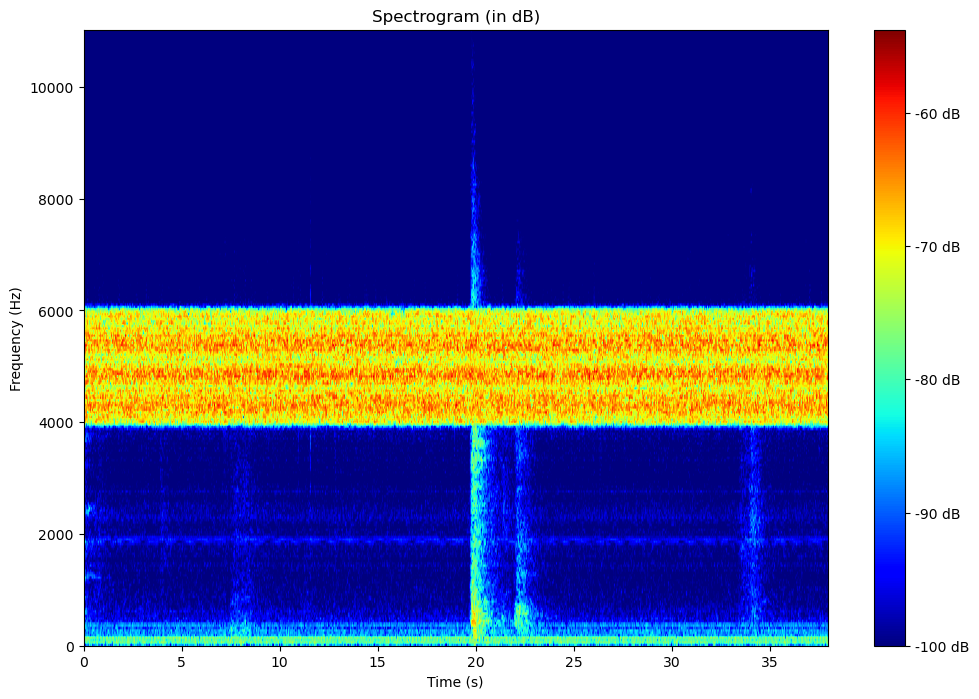

In [14]:
data_path = './data/piday/piday_atrium_speaker_left_noise_4khz.32b'
fs = 22050
nperseg = 512
x__ = import_and_split(data_path,normalize=True)
f_, t_, X___ = scipy.signal.spectrogram(
  x__, fs=fs, mode='complex',nperseg=nperseg,window='hamming',noverlap=int(1*nperseg/2))
X___ = X___.swapaxes(0,1)
print(X___.shape)

import numpy as np
import matplotlib.pyplot as plt

def plot_spectrogram_in_db(stft_output, sr, hop_length):
    """
    Plots a spectrogram in dB scale.

    Parameters:
    - stft_output: The output of an STFT, as a 2D complex array.
    - sr: Sampling rate of the audio signal.
    - hop_length: The number of samples between successive frames.

    """
    # Convert the STFT output to magnitude (amplitude) values
    magnitude = np.abs(stft_output)
    
    # Convert the magnitude to dB scale
    magnitude_db = 20 * np.log10(np.maximum(magnitude, 1e-5))  # Use 1e-5 to avoid log(0)

    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Setting the aspect ratio to 'auto' for automatic scaling
    # 'Y-axis' is frequency in Hz, 'X-axis' is time in seconds
    # extent is used to scale the axes, [x_min, x_max, y_min, y_max]
    plt.imshow(magnitude_db, aspect='auto', origin='lower', 
               extent=[0, magnitude.shape[1] * hop_length / sr, 0, sr / 2],
               cmap='jet')

    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (in dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    
plot_spectrogram_in_db(X___[:,0,:],fs,nperseg)